 # Check current working directory

In [12]:
!cat cryspy.in

[basic]
algo = EA
calc_code = ASE
nstage = 1
njob = 20
jobcmd = zsh
jobfile = job_cryspy

[structure]
atype = Si
nat = 8

[EA]
n_pop = 20
n_crsov = 10
n_perm = 0
n_strain = 5
n_rand = 5
n_elite = 2
n_fittest = 10
slct_func = TNM
t_size = 2
maxgen_ea = 3

[ASE]
ase_python = ase_in.py

[option]

In [13]:
#pkg_resource error fix by pip install setup tools 
from cryspy.interactive import action
action.clean(skip_yes=True)
action.initialize()

[2025-12-03 15:48:21,557][cryspy_init][INFO] 


Start CrySPY 1.4.0b10


[2025-12-03 15:48:21,559][cryspy_init][INFO] # ---------- Library version info
[2025-12-03 15:48:21,566][cryspy_init][INFO] pandas version: 2.3.2
[2025-12-03 15:48:21,583][cryspy_init][INFO] pymatgen version: 2025.6.14
[2025-12-03 15:48:21,590][cryspy_init][INFO] pyxtal version: 1.1.0
[2025-12-03 15:48:21,596][cryspy_init][INFO] # ---------- Read input file, cryspy.in
[2025-12-03 15:48:21,616][write_input][INFO] [basic]
[2025-12-03 15:48:21,618][write_input][INFO] algo = EA
[2025-12-03 15:48:21,623][write_input][INFO] calc_code = ASE
[2025-12-03 15:48:21,628][write_input][INFO] nstage = 1
[2025-12-03 15:48:21,637][write_input][INFO] njob = 20
[2025-12-03 15:48:21,642][write_input][INFO] jobcmd = zsh
[2025-12-03 15:48:21,649][write_input][INFO] jobfile = job_cryspy
[2025-12-03 15:48:21,657][write_input][INFO] 
[2025-12-03 15:48:21,666][write_input][INFO] [structure]
[2025-12-03 15:48:21,673][write_input][INFO] struc

In [ ]:
# ---------- EMT in ASE
#from ase.calculators.emt import EMT
from ase.constraints import FixSymmetry
import ipywidgets as widgets
#from chgnet.model import CHGNetCalculator
from ase.filters import FrechetCellFilter
from ase.io import read, write
from ase.optimize import FIRE, BFGS, LBFGS
from mattersim.forcefield import MatterSimCalculator
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
calculator = MatterSimCalculator(load_path="MatterSim-v1.0.0-5M.pth", device=device)
widgets.IntProgress()
# ---------- structure optimization




[2025-12-03 15:48:24,120][cryspy_restart][INFO] 


Restart CrySPY 1.4.0b10


[2025-12-03 15:48:24,122][cryspy_restart][INFO] read input, cryspy.in


  0%|          | 0/20 [00:00<?, ?it/s]

[2025-12-03 15:51:35,832][ctrl_job][INFO] Done generation 1
[2025-12-03 15:51:35,835][ctrl_job][INFO] 
EA is ready


SystemExit: 

/Users/kongkitimanon2024/Documents/Github/SOAP-similarity-and-Clustering/algori/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
action.restart(   
    njob=0,    # njob=0: njob in cryspy.in will be used
    calculator=calculator,
    optimizer='BFGS',    # 'FIRE', 'BFGS' or 'LBFGS'
    symmetry=True,       # default: True
    fmax=0.01,           # default: 0.01
    steps=2000,          # default: 2000
)

In [15]:
# ---------- show results
#!cat ./data/cryspy_rslt    # Order of structure optimization completion
!cat ./data/cryspy_rslt_energy_asc    # show energy ascending order
#!sed -n 2,4p ./data/cryspy_rslt    # show i--jth lines
#!tail -n 5 ./data/cryspy_rslt    # show last 5 lines

    Gen  Spg_num   Spg_sym  Spg_num_opt Spg_sym_opt  E_eV_atom  Magmom   Opt
6     1       52      Pnna          194    P6_3/mmc  -5.403260     NaN  done
1     1      221     Pm-3m          221       Pm-3m  -5.086847     NaN  done
5     1      123    P4/mmm          221       Pm-3m  -5.086846     NaN  done
9     1      139    I4/mmm          221       Pm-3m  -5.086843     NaN  done
15    1        5        C2            5          C2  -5.063447     NaN  done
13    1        2       P-1          123      P4/mmm  -5.043940     NaN  done
12    1      215     P-43m          215       P-43m  -5.022468     NaN  done
7     1      137  P4_2/nmc          137    P4_2/nmc  -4.977411     NaN  done
2     1       91    P4_122           91      P4_122  -4.974051     NaN  done
0     1      191    P6/mmm          191      P6/mmm  -4.958385     NaN  done
19    1       34      Pnn2           52        Pnna  -4.934871     NaN  done
14    1       92  P4_12_12           98      I4_122  -4.933999     NaN  done

Number of generation: 1
Number of data: 20
Success: 20
Error: 0
Emin: -5.403260231018066 eV/atom


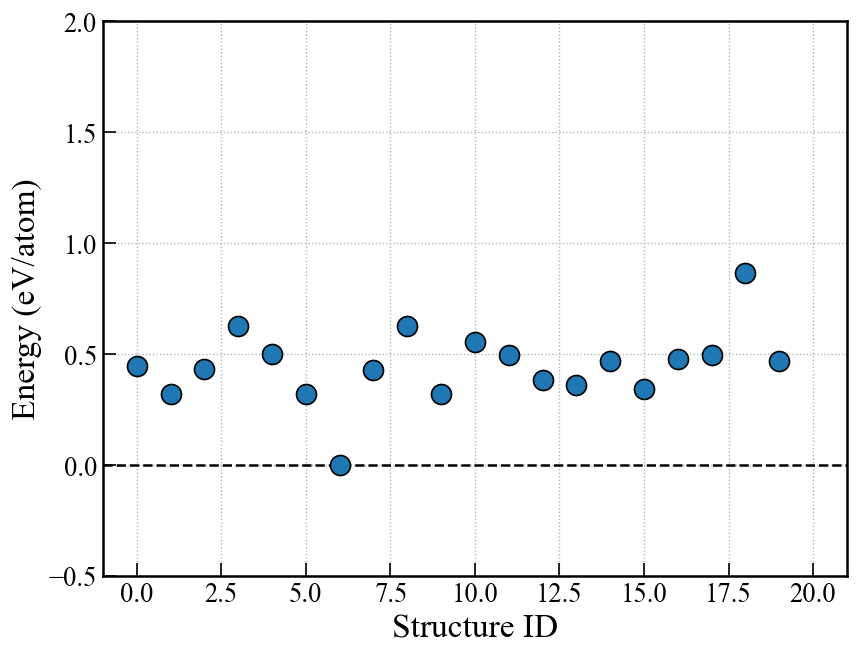

In [16]:
# Structure visualization
from ase.visualize import view
atoms = action.get_atoms('opt', cid=0)    # 'init' or 'opt'
view(atoms, viewer='ngl')    # viewer = 'ngl', 'ase', or 'x3d'
#Energy plot
fig, ax = action.plot_E(
              title=None,
              ymax=2.0,
              ymin=-0.5,
              markersize=12,
              marker_edge_width=1.0,
              marker_edge_color='black',
              alpha=1.0,
          )